# Surface Corrections


In [1]:
from PeriFlakes import *
from SimDataDB import *
from matplotlib import pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]

In [2]:
sdb = SimDataDB('surfaceresults.db')

In [ ]:
H = 2.0 ; T = 1.0 ; E = 1.0 ; nu = 0.25;
solutions = {'uniaxial': (1, T*H*(2.0*nu**2+nu-1.0)/(E*(nu-1))),
             'isotropic':(1, T*H*(1.0-nu-2.0*nu**2)/E),
             'shear':    (0, 2.0*T*H*(1.0+nu)/E) }

In [3]:
L=1.0
N=10
delta= 1.5*2.0*L/float(N)
PB = PeriBlock(L,N,delta,ficticious=True)
PB.setbcs([(PB.right,0),(PB.left,0),(PB.bottom,1)], [(PB.top,1)])

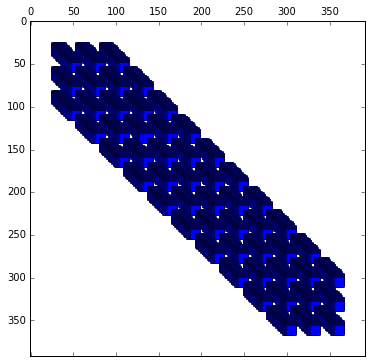

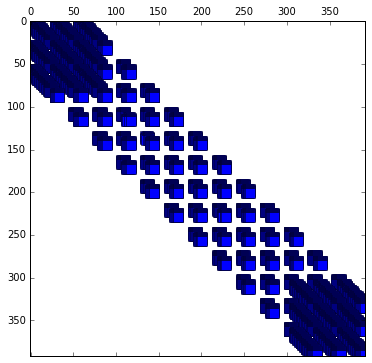

In [4]:
K,R = PB._assemble_KR("Fbased","cubic")
plt.spy(K)
plt.show()
Kf,Rf = PB._assemble_KR_fict("standard","Fbased","cubic")
plt.spy(Kf)
plt.show()

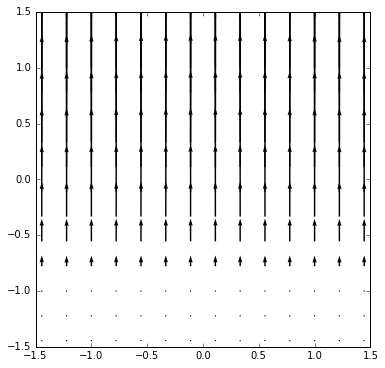

In [13]:
u = PB.solve("Silling","cubic")
N = int(PB.NPart**0.5)
u = u.reshape(N,N,2)
x = PB.x.reshape(N,N,2)
ax = plt.gca()
ax.quiver(x[:,:,0],x[:,:,1],u[:,:,0],u[:,:,1],angles='uv',scale_units='xy',scale=10.0)
ax.set_aspect('equal', 'datalim')

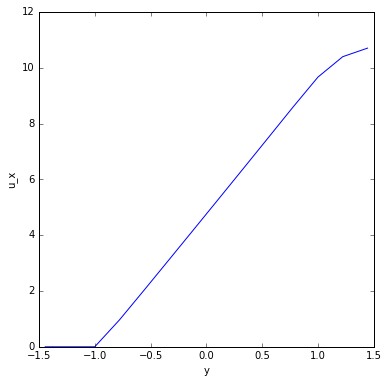

In [14]:
plt.plot(x[:,N/2,1],u[:,N/2,1])
plt.xlabel('y'); plt.ylabel('u_x');

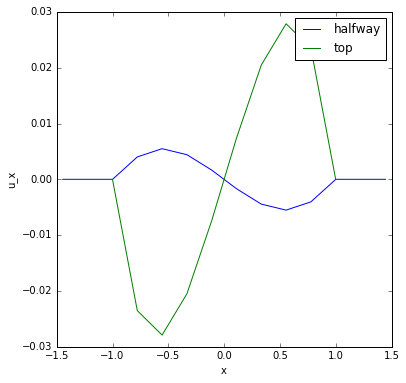

In [15]:
plt.plot(x[:,N/2,1],u[N/2,:,0],label='halfway');
plt.plot(x[:,N/2,1],u[-1,:,0],label='top');
plt.legend()
plt.xlabel('x'); plt.ylabel('u_x');